# Insights about Prosper Loan
## by Lloyd Ponrajah

## Preliminary Wrangling

> The Prosper Loan dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


In [36]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_palette("colorblind")

%matplotlib inline

In [3]:
prolon1 = pd.read_csv('ProsperData1.csv')
prolon2 = pd.read_csv('ProsperData2.csv')
prolon3 = pd.read_csv('ProsperData3.csv')
prolon4 = pd.read_csv('ProsperData4.csv')
prolon5 = pd.read_csv('ProsperData5.csv')


In [4]:
prolon1.shape[0]

9999

In [5]:
proloan = prolon1.append(prolon2, ignore_index = True)

In [6]:
proloan = proloan.append(prolon3, ignore_index = True)

In [7]:
proloan = proloan.append(prolon4, ignore_index = True)

In [8]:
proloan = proloan.append(prolon5, ignore_index = True)

In [9]:
proloan.shape[0]

49999

In [10]:
proloan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?


In [11]:
proloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 81 columns):
ListingKey                             49999 non-null object
ListingNumber                          49999 non-null int64
ListingCreationDate                    49999 non-null object
CreditGrade                            12701 non-null object
Term                                   49999 non-null int64
LoanStatus                             49999 non-null object
ClosedDate                             24219 non-null object
BorrowerAPR                            49992 non-null float64
BorrowerRate                           49999 non-null float64
LenderYield                            49999 non-null float64
EstimatedEffectiveYield                37248 non-null float64
EstimatedLoss                          37248 non-null float64
EstimatedReturn                        37248 non-null float64
ProsperRating (numeric)                37248 non-null float64
ProsperRating (Alpha)           


### What is/are the main feature(s) of interest in your dataset?


###### Prosper uses a proprietary system to evaluate applicants consistently. Investors also use it to decide whether to commit to invest in a given loan.

###### Prosper assigns the loan applicant a rating. It determines the interest rate that they will pay for their loan. Ratings range from AA, for the highest grade, then A, B, C, D, E, and HR for the lowest.

###### This rating system was introduced for loans that originated after 2009. Therfore for this analysis I'll be only focusing on data that has a Prosper rating captured against it.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


###### I intend to explore the following features:
    
    LoanStatus    
    BorrowerAPR    
    BorrowerRate    
    ProsperRating (numeric)    
    ProsperRating (Alpha)    
    ListingCategory    
    EmpoymentStatus    
    CreditScoreRangeLower    
    CreditScoreRangeUpper    
    LoanOriginationQuarter

## Data Wrangling

##### Step 1. Remove records that don't have Prosper Rating

In [18]:
proloan_nn = proloan.copy()
proloan_nn = proloan_nn.loc[proloan_nn['ProsperRating (Alpha)'].notnull()]

In [19]:
type(proloan_nn)

pandas.core.frame.DataFrame

##### Step 2. Order Prosper rating: AA, A, B, C, D, E and HR where AA is the lowest risk down to HR which actually stands for high risk.

##### Step 3. Create new column that contains the year

In [20]:
proloan_nn['year'] = proloan_nn['LoanOriginationQuarter'].str.extract('(\s\d+)')

## Univariate Exploration


###### The first graph shows the number of loans irrespective of status.

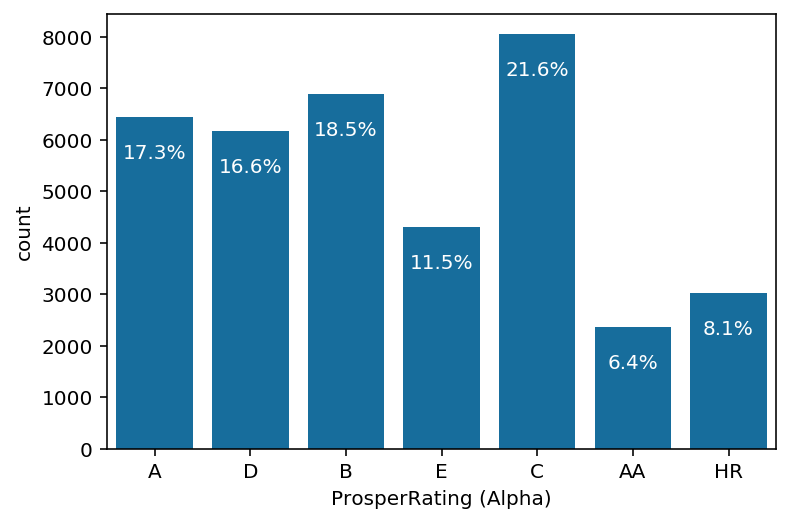

In [92]:
base_col = sb.color_palette()[0]
sb.countplot(data = proloan_nn, x = 'ProsperRating (Alpha)', color = base_col)

n_points = proloan_nn.shape[0]
rate_count = proloan_nn['ProsperRating (Alpha)'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip (locs, labels):
    count = rate_count[label.get_text()]
    pct_str = '{:0.1f}%'.format(100*count/n_points)
    
    plt.text(loc, count-800, pct_str, ha = 'center', color = 'w')

###### This graph shows the count of every loan status

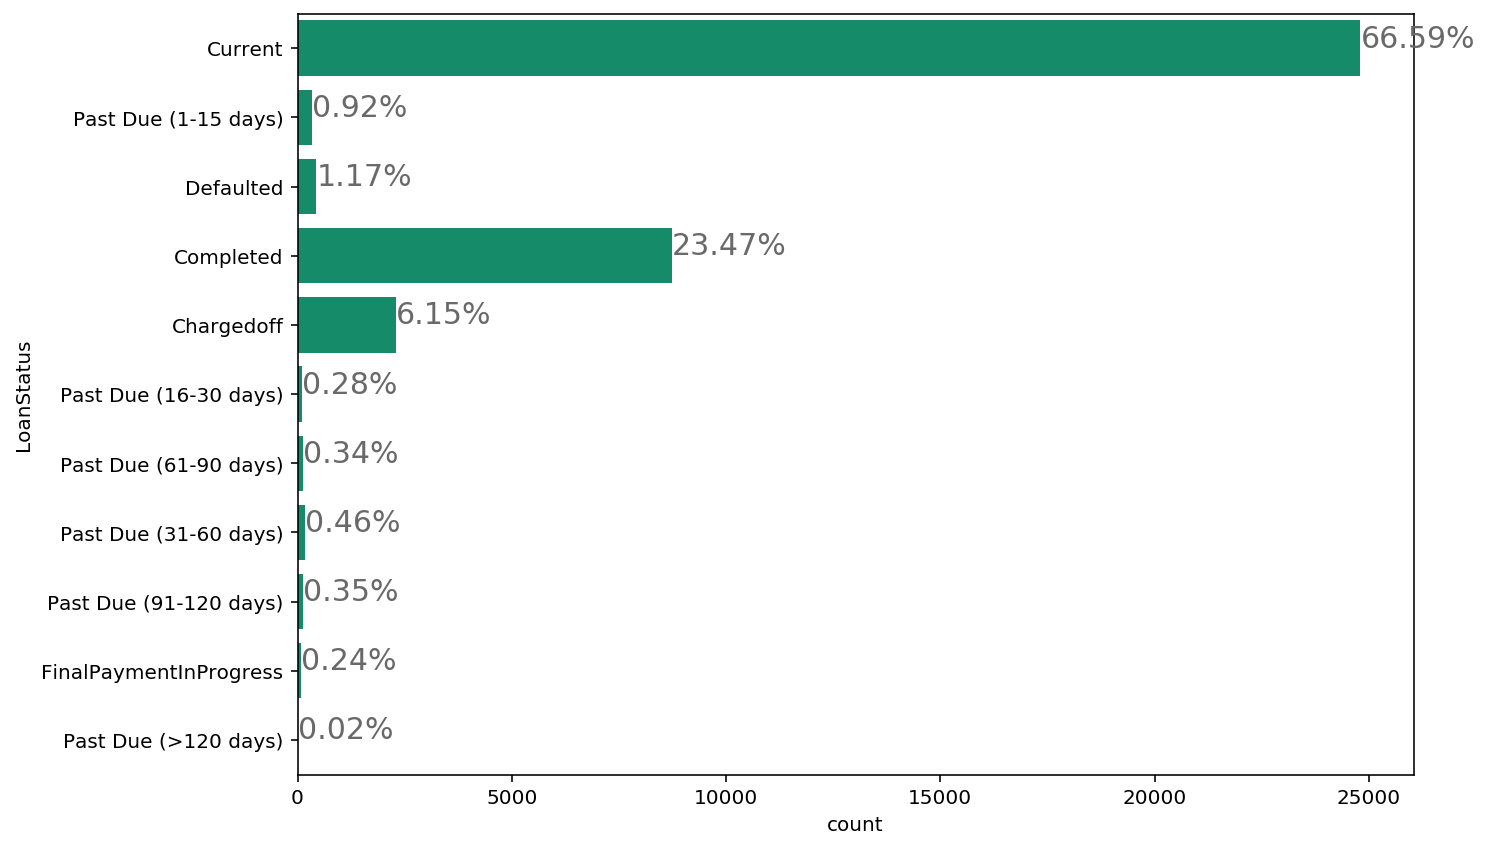

In [93]:
plt.figure(figsize=(10,7))
base_col = sb.color_palette()[2]
loanst = sb.countplot(data = proloan_nn, y = 'LoanStatus', color = base_col)

totals = []

for i in loanst.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in loanst.patches:
    # get_width pulls left or right; get_y pushes up or down
    loanst.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

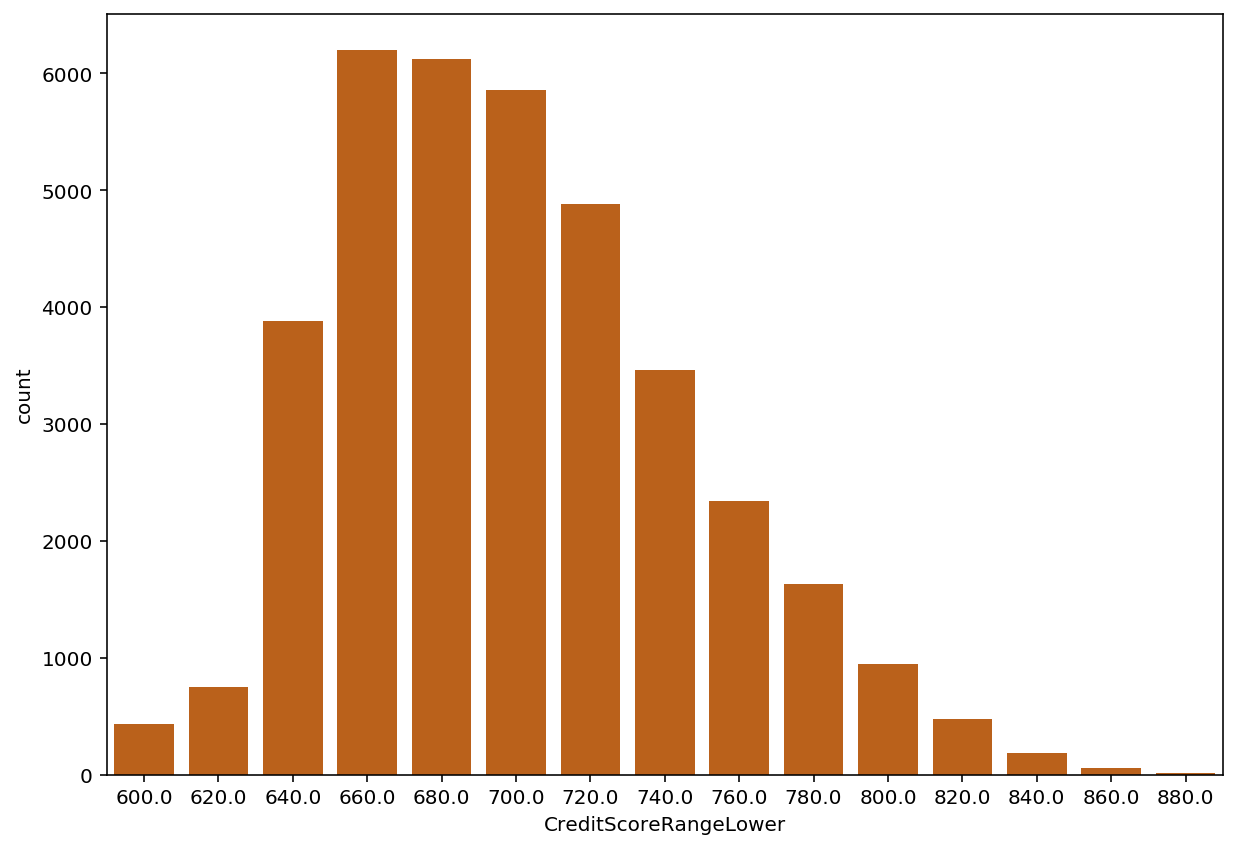

In [96]:
plt.figure(figsize=(10,7))
base_col = sb.color_palette()[3]
loanst = sb.countplot(data = proloan_nn, x = 'CreditScoreRangeLower', color = base_col)


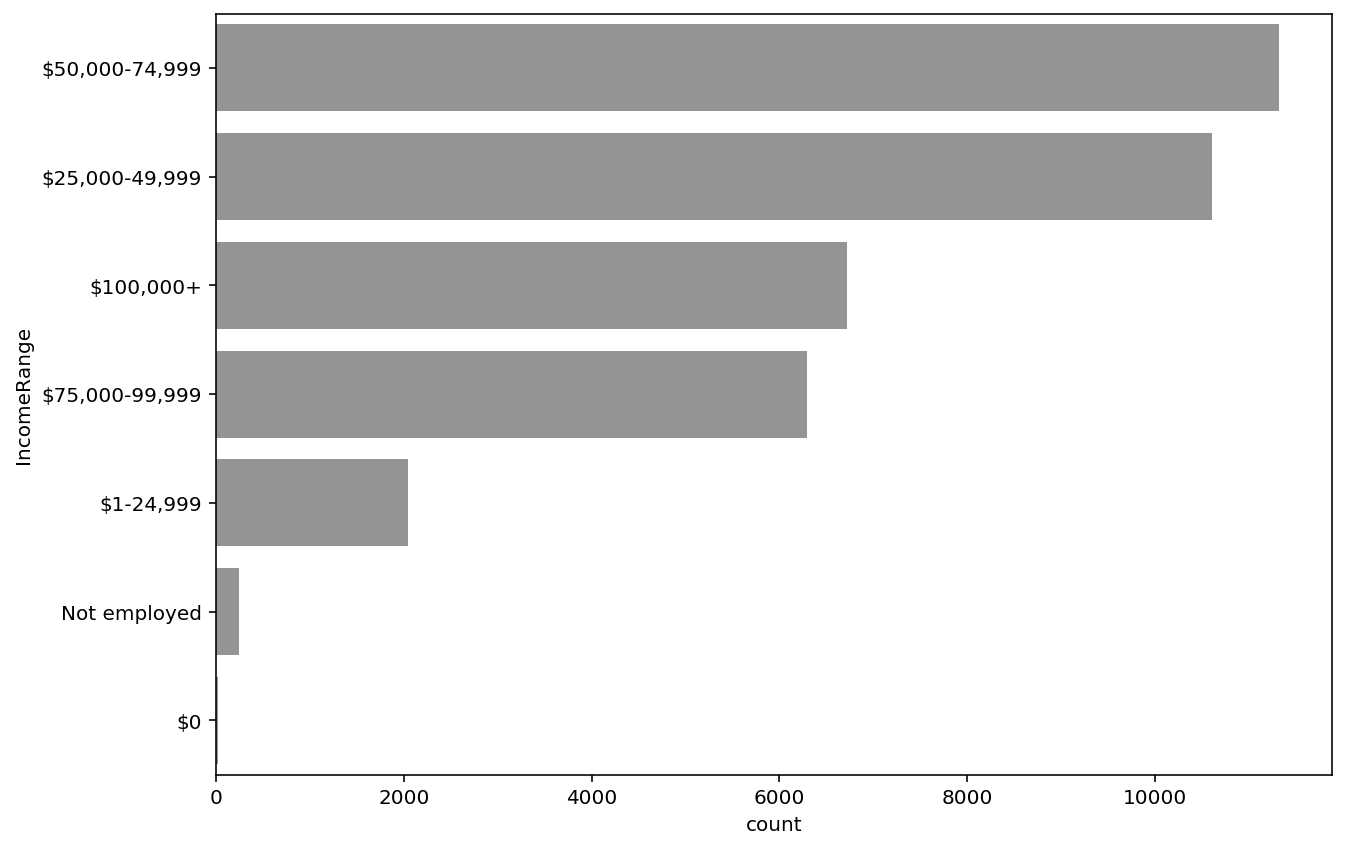

In [100]:
plt.figure(figsize=(10,7))
base_col = sb.color_palette()[7]
loanst = sb.countplot(data = proloan_nn, y = 'IncomeRange', color = base_col)

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

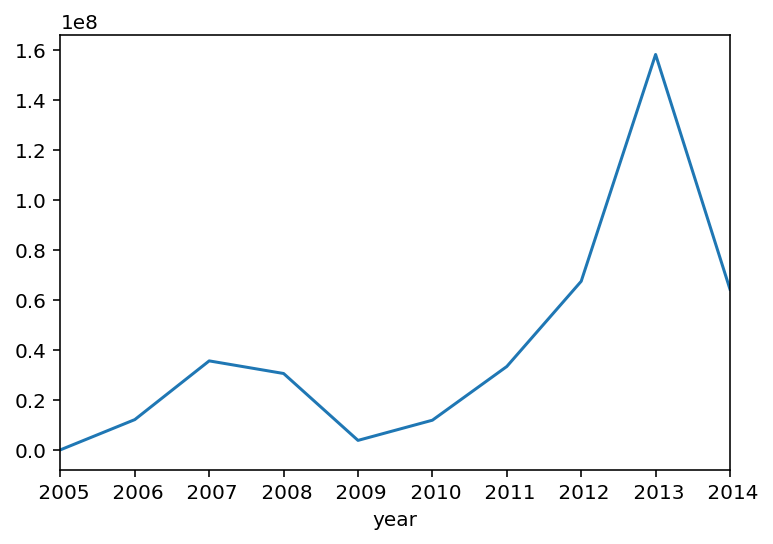

In [38]:
proloan.groupby('year').LoanOriginalAmount.sum().plot()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!